In [7]:
# Import necessary imports.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

config = {'font.family': 'serif', 'font.serif': ['Times New Roman']}
plt.rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('./Dataset/Concrete Compressive Strength.csv')
df.shape

(1030, 9)

#### 相关性与相关显著性

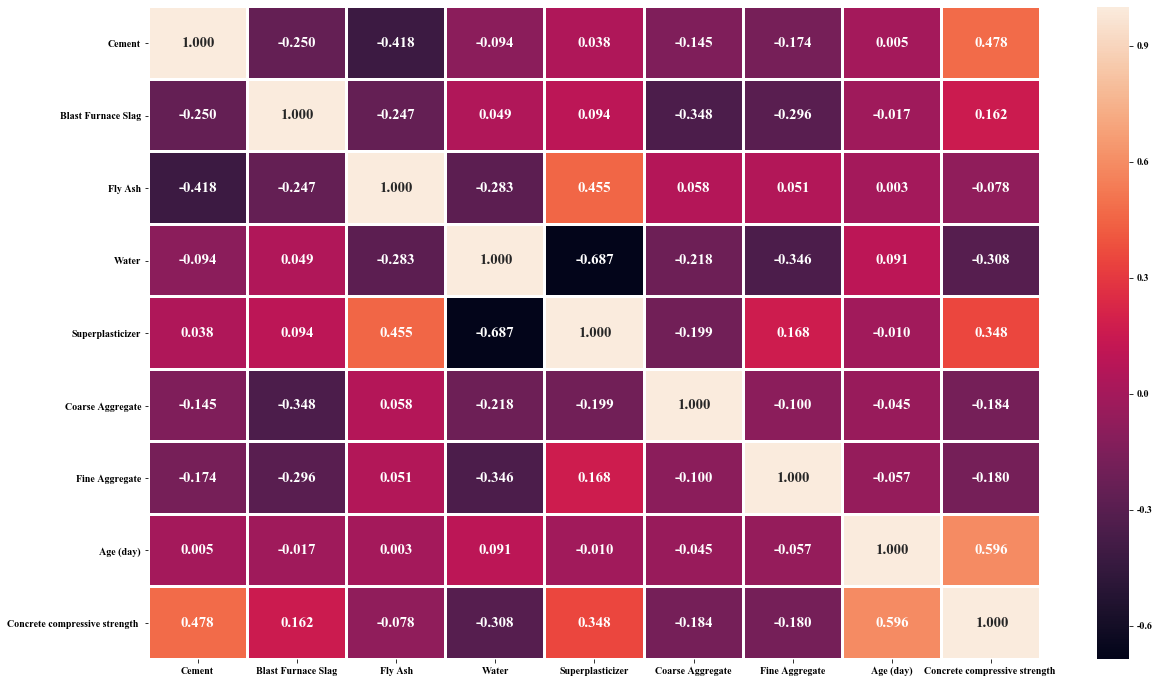

In [4]:
plt.figure(figsize = (20, 12))
# df.corr() method: Literal['pearson', 'kendall', 'spearman']
sns.heatmap(df.corr(method='spearman'), annot = True, fmt = '0.3f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'white')
plt.show()

进一步打印出个特征变量与目标变量之间相关性系数，以及相关系数是否显著的P值.

In [14]:
# 此处参考了https://github.com/kfs196项目.
df_spearman = pd.DataFrame(columns=df.columns, index=['Spearman_r','Spearman_p'])
# 分别计算每个特征与目标变量之间的相关性.

for item in df.columns:
    spearman_r, spearman_p = stats.spearmanr(df[item], df['Concrete compressive strength '])
    df_spearman[item]['Spearman_r'] = np.round(spearman_r, 3)
    df_spearman[item]['Spearman_p'] = np.round(spearman_p, 3)

df_spearman

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
Spearman_r,0.478,0.162,-0.078,-0.308,0.348,-0.184,-0.18,0.596,1.0
Spearman_p,0.0,0.0,0.012,0.0,0.0,0.0,0.0,0.0,0.0


上述结果中，可以看到Cement、Superlasticizer以及Age与Concrete compressive strength之间存在较高线性关系。
p值用于检验相关系数的统计显著性，通常如果p值小于0.05，则认为相关性是显著的。

In [15]:
# distinguish feature and label.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12)

In [17]:
# 特征标准化.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [18]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor()
cat_model.fit(X_train, y_train)

Learning rate set to 0.03971
0:	learn: 16.4557744	total: 146ms	remaining: 2m 25s
1:	learn: 16.1099356	total: 155ms	remaining: 1m 17s
2:	learn: 15.7755363	total: 160ms	remaining: 53.2s
3:	learn: 15.3902530	total: 167ms	remaining: 41.5s
4:	learn: 15.0187238	total: 171ms	remaining: 34s
5:	learn: 14.6710356	total: 173ms	remaining: 28.7s
6:	learn: 14.3341523	total: 175ms	remaining: 24.9s
7:	learn: 14.0230334	total: 178ms	remaining: 22.1s
8:	learn: 13.7431668	total: 182ms	remaining: 20s
9:	learn: 13.4353710	total: 184ms	remaining: 18.3s
10:	learn: 13.1374950	total: 186ms	remaining: 16.7s
11:	learn: 12.8786834	total: 188ms	remaining: 15.5s
12:	learn: 12.6034340	total: 191ms	remaining: 14.5s
13:	learn: 12.3598901	total: 193ms	remaining: 13.6s
14:	learn: 12.0934743	total: 196ms	remaining: 12.8s
15:	learn: 11.8688349	total: 197ms	remaining: 12.1s
16:	learn: 11.6345875	total: 199ms	remaining: 11.5s
17:	learn: 11.4021176	total: 202ms	remaining: 11s
18:	learn: 11.1616827	total: 205ms	remaining: 10.

In [21]:
print(cat_model.score(X_train, y_train), cat_model.score(X_test, y_test))

0.9888853298098592 0.9436559682218028


#### 模型拟合效果

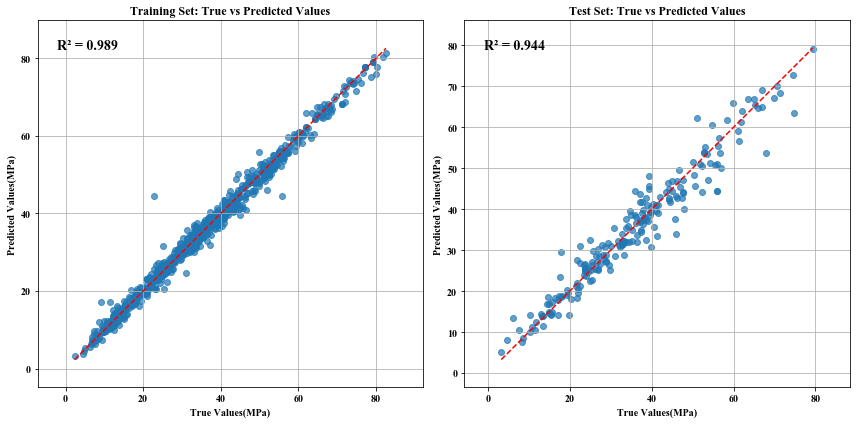

In [29]:
from sklearn.metrics import r2_score

# 获取预测值
y_train_pred = cat_model.predict(X_train)
y_test_pred = cat_model.predict(X_test)

# 计算 R² 值
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# 创建散点图
plt.figure(figsize=(12, 6))

# 绘制训练集
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r')  # 参考线
plt.title('Training Set: True vs Predicted Values')
plt.xlabel('True Values(MPa)')
plt.ylabel('Predicted Values(MPa)')
plt.axis('equal')  # 使坐标轴比例相同
plt.grid(True)
plt.text(0.05, 0.95, f'R² = {r2_train:.3f}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

# 绘制测试集
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # 参考线
plt.title('Test Set: True vs Predicted Values')
plt.xlabel('True Values(MPa)')
plt.ylabel('Predicted Values(MPa)')
plt.axis('equal')  # 使坐标轴比例相同
plt.text(0.05, 0.95, f'R² = {r2_test:.3f}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')
plt.grid(True)
plt.tight_layout()  # 自动调整布局
plt.show()

#### 抗压强度随养护时间的变化规律

In [ ]:
# 此处参考了https://github.com/kfs196项目.
# https://nbviewer.org/github/kfs196/SimpleMLDemo-Concrete/blob/main/FinalReport2.ipynb
df['Cement'].value_counts()

425.00    20
362.60    20
251.37    15
446.00    14
310.00    14
          ..
451.00     1
151.60     1
133.10     1
145.90     1
260.90     1
Name: Cement, Length: 280, dtype: int64